## LETK Filtering


In [1]:
import Simulator
import Observation
import Statistics
import LEnKalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2021_08_11-14_10_29"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
statistics = Statistics.Statistics(simulator, N_e=100)

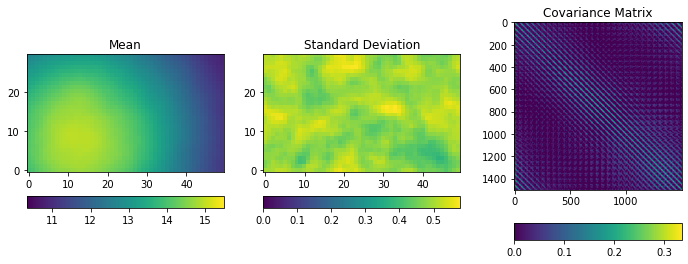

In [4]:
prior_args = Statistics.prior_args_from_file(timestamp)
statistics.set_prior(prior_args)

statistics.plot()

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [5]:
obs_timestamp = "2021_08_11-14_10_37"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


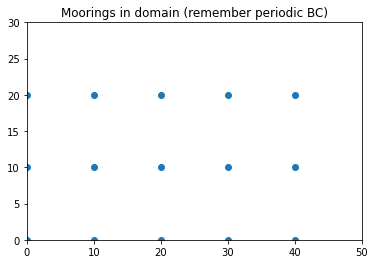

In [6]:
observation.plot_positions()

## LETKF filtering

Updating/conditioning the distributions at every observation time

In [7]:
lenkFilter = LEnKalmanFilter.LEnKalman(statistics, observation, 5)

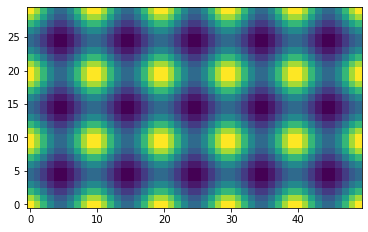

In [8]:
from matplotlib import pyplot as plt
plt.imshow(lenkFilter.W_analysis, origin="lower")

In [9]:
import numpy as np

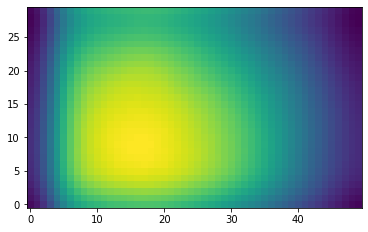

In [10]:
statistics.propagate(25)
plt.imshow(np.reshape(statistics.mean, (grid.ny, grid.nx)), origin="lower")
plt.show()

In [11]:
observation.obses[0][13]

13.995845880558395

In [12]:
(observation.H @ statistics.mean)[13]

13.599013249580096

(array([ 1.,  3.,  4., 16., 21., 18., 21.,  8.,  4.,  4.]),
 array([12.50460998, 12.70997023, 12.91533048, 13.12069074, 13.32605099,
        13.53141124, 13.73677149, 13.94213175, 14.147492  , 14.35285225,
        14.55821251]),
 <BarContainer object of 10 artists>)

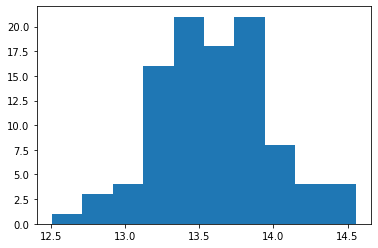

In [13]:
plt.hist((observation.H @ statistics.ensemble.ensemble)[13])

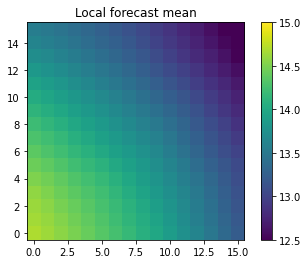

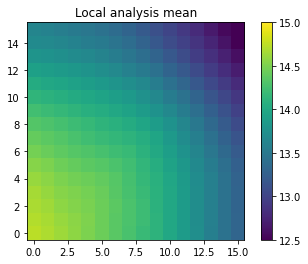

array([[0.35713648, 0.36877059, 0.35202058, ..., 0.35713392, 0.36363296,
        0.36442511],
       [1.64161566, 1.68846518, 1.61979285, ..., 1.64989299, 1.65939091,
        1.65478176],
       [3.64087818, 3.74305542, 3.59773048, ..., 3.6745187 , 3.66516122,
        3.6161046 ],
       ...,
       [3.47140566, 3.670458  , 3.48280692, ..., 3.43139697, 3.52963748,
        3.56593545],
       [1.59571247, 1.67173316, 1.59151267, ..., 1.5949883 , 1.63594069,
        1.64319522],
       [0.34929209, 0.36682437, 0.34616646, ..., 0.35329768, 0.36219064,
        0.36196601]])

In [14]:

lenkFilter.filter(statistics.ensemble.ensemble, observation.obses[0])


In [15]:
from matplotlib import pyplot as plt 
import numpy as np

In [16]:
statistics.set_prior(prior_args)
statistics.propagate(25)

In [17]:
X_f = statistics.ensemble.ensemble

In [18]:
d = 13

L = lenkFilter.all_Ls[13]

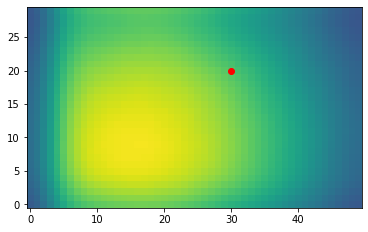

In [19]:
plt.imshow(np.reshape(np.average(X_f, axis=1), (grid.ny,grid.nx)), origin="lower", vmin=10, vmax=15)

plt.scatter(lenkFilter.observation_positions[d][0]/grid.dx, lenkFilter.observation_positions[d][1]/grid.dy, c ="red")

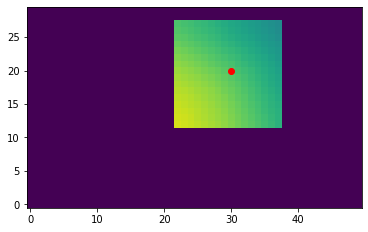

In [20]:
plt.imshow(np.reshape(np.average(statistics.ensemble.ensemble, axis=1), (grid.ny,grid.nx))*1.0*L, origin="lower", vmin=10, vmax=15)

plt.scatter(lenkFilter.observation_positions[d][0]/grid.dx, lenkFilter.observation_positions[d][1]/grid.dy, c ="red")

In [21]:
observation.obses[0][d]

13.995845880558395

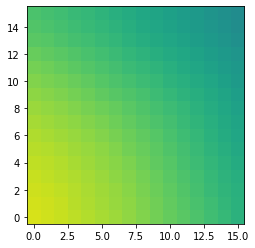

In [22]:
X_f_loc = np.reshape(statistics.ensemble.ensemble, (grid.ny, grid.nx, 100))[L,:]
plt.imshow(np.reshape(np.average(X_f_loc, axis=1),(16,16)), origin="lower", vmin=10, vmax=15)

In [23]:
HX_f_d = (observation.H @ X_f)[d]

In [24]:
H_idx = np.where(np.sum(X_f_loc == HX_f_d, axis=1) > 0)[0][0]

In [25]:
H_loc = np.zeros((1,256))
H_loc[0,H_idx] = 1

In [28]:
HX_f_loc = H_loc @ X_f_loc
HX_f_loc

array([[13.12083196, 13.73739945, 13.4520602 , 13.2095808 , 13.09850613,
        13.12882907, 13.30745766, 13.09974217, 13.22156904, 13.24053035,
        13.73507888, 13.61911198, 13.62942297, 13.07675571, 13.65342365,
        13.84628032, 14.32278098, 13.4391092 , 13.35099829, 14.4655819 ,
        14.3293185 , 14.10861197, 14.02583624, 13.91066295, 13.92313192,
        14.2556047 , 13.80613561, 13.12759845, 13.29886225, 13.59504987,
        14.09474446, 14.05086665, 13.23131196, 13.32159102, 13.27715076,
        13.45265106, 13.72976666, 13.77388752, 14.24757472, 14.05415428,
        14.60146673, 12.73488998, 13.47536339, 13.15136865, 13.93669469,
        13.66698539, 13.87060804, 13.34082897, 14.17369984, 13.08934364,
        13.64496347, 14.04442643, 12.88043537, 13.63901062, 13.60279234,
        13.58215625, 13.35910828, 13.14134889, 13.37422361, 13.52943837,
        13.45353689, 13.20053784, 13.37291574, 13.09770006, 14.19313531,
        13.61757811, 13.95894082, 13.74192626, 13.8

In [29]:
X_f_loc_mean = np.reshape(np.average(X_f_loc, axis=1),(256,1))

In [30]:
C = 1/(100-1)*((X_f_loc-X_f_loc_mean) @ (X_f_loc-X_f_loc_mean).T)

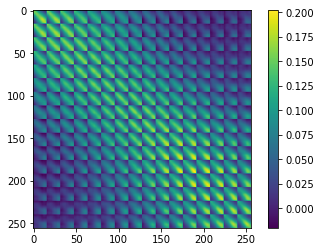

In [31]:
plt.imshow(C)
plt.colorbar()

In [32]:
R = observation.R[d,d]
R

0.010000000000000002

In [33]:
S = H_loc @ C @ H_loc.T + R
S

array([[0.17171209]])

In [35]:
K = C @ H_loc.T @ np.linalg.inv(S)
K

array([[0.08286818],
       [0.15127306],
       [0.2078847 ],
       [0.26718142],
       [0.31193696],
       [0.35048584],
       [0.38418037],
       [0.40699726],
       [0.41557018],
       [0.40095383],
       [0.36782097],
       [0.35053919],
       [0.34157647],
       [0.31571709],
       [0.2569803 ],
       [0.21293501],
       [0.10579891],
       [0.1683757 ],
       [0.22560516],
       [0.30437349],
       [0.36779379],
       [0.40518565],
       [0.4436472 ],
       [0.47353953],
       [0.47565917],
       [0.46666523],
       [0.4103593 ],
       [0.38159504],
       [0.36596339],
       [0.34143992],
       [0.28825932],
       [0.23199356],
       [0.12614181],
       [0.17236365],
       [0.2481842 ],
       [0.33613743],
       [0.40880953],
       [0.47051791],
       [0.50743732],
       [0.52753555],
       [0.53311503],
       [0.52310249],
       [0.48501117],
       [0.43887787],
       [0.41180761],
       [0.37441822],
       [0.304566  ],
       [0.245

In [36]:
D = observation.obses[0][d] - HX_f_loc + np.random.normal(0, np.sqrt(R), 100)
D

array([[ 9.35291108e-01,  2.61046242e-01,  6.16520953e-01,
         7.43791677e-01,  7.66409009e-01,  8.89575715e-01,
         5.84876074e-01,  8.65318523e-01,  8.67879534e-01,
         6.59856216e-01,  3.93481429e-01,  5.18197399e-01,
         4.52810156e-01,  7.43162738e-01,  3.74131137e-01,
         1.70672922e-01, -5.16167748e-01,  6.56395357e-01,
         7.09049955e-01, -6.00955774e-01, -3.18193960e-01,
         9.67246418e-02, -1.38799631e-02,  3.34022232e-02,
         4.87042052e-02, -3.84488892e-01,  2.38633693e-01,
         7.92182676e-01,  8.42578479e-01,  5.82626250e-01,
         5.56064546e-02,  4.96501319e-04,  7.16594100e-01,
         6.70334538e-01,  7.23661944e-01,  6.96201834e-01,
         1.75691293e-01,  2.18643415e-01, -3.49987523e-01,
        -1.81753848e-01, -4.02500026e-01,  1.34468128e+00,
         5.56906828e-01,  8.15822112e-01, -7.25567541e-03,
         2.89350818e-01,  1.64031184e-01,  8.05434800e-01,
        -1.36727222e-01,  1.07121703e+00,  4.10567013e-0

In [37]:
X_a_loc = X_f_loc + K @ D

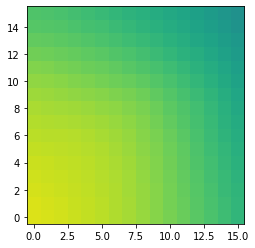

In [38]:
plt.imshow(np.reshape(np.average(X_a_loc, axis=1),(16,16)), origin="lower", vmin=10, vmax=15)

In [39]:
H_loc @ X_a_loc

array([[14.00165451, 13.98324313, 14.03267681, 13.91005627, 13.82028176,
        13.96659854, 13.85827229, 13.91466713, 14.03890586, 13.86195851,
        14.10564513, 14.1071311 , 14.05586281, 13.77663887, 14.00576651,
        14.00701376, 13.8366733 , 14.05727805, 14.01875529, 13.899624  ,
        14.02965521, 14.19970366, 14.0127646 , 13.94211992, 13.96899973,
        13.8935073 , 14.03087199, 13.87364677, 14.09237147, 14.1437457 ,
        14.14711256, 14.05133424, 13.90617375, 13.95288727, 13.95866879,
        14.10830818, 13.89522622, 13.97979779, 13.91796943, 13.88298523,
        14.2224071 , 14.00126103, 13.99983763, 13.91967972, 13.92986156,
        13.93948528, 14.02508654, 14.09935764, 14.0449352 , 14.09817619,
        14.03162028, 13.91712503, 14.0474168 , 13.97833734, 13.97395074,
        13.94392797, 13.93995779, 14.00892126, 13.97420476, 14.02491005,
        13.92471528, 13.94745721, 14.06940831, 13.91341604, 14.05165921,
        14.04810561, 14.02997139, 14.01534476, 14.0